<a href="https://colab.research.google.com/github/Amanblackdevil/Machine-Learning/blob/main/Logistic_Regression_Practice_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [15]:

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 73.03%


In [20]:
#Evaluation of the model
print("Confusion_matrix : \n", confusion_matrix(y_test, y_pred))
print("Classfication Regport : \n", classification_report(y_test, y_pred))

Confusion_matrix : 
 [[36 13]
 [11 29]]
Classfication Regport : 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



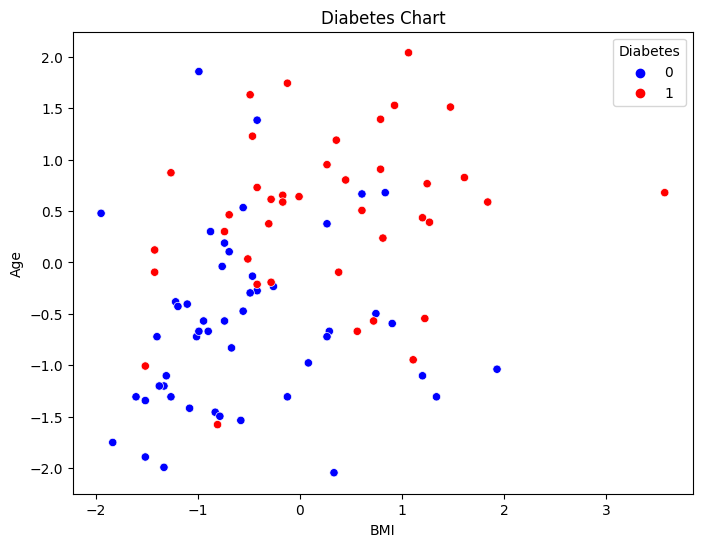

In [22]:
#Visualize the information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={0:'blue', 1:'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Diabetes Chart")
plt.legend(title='Diabetes', loc="upper right")
plt.show()

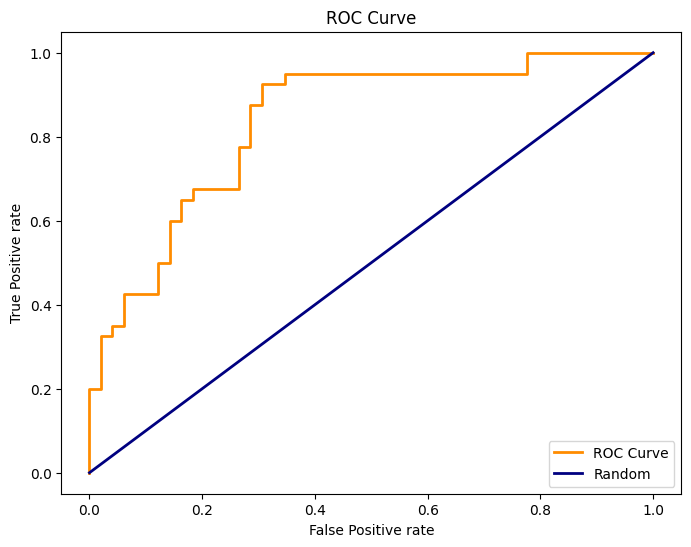

In [27]:
#Plotting roc curve
y_prob = model.predict_proba(X_test)[:, 1]  #Roc curve used graph showing the performace of a classification model at all the classification threshoold
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], color='navy', lw=2, label='Random')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()